In [1]:
#reference : https://datawokagaku.com/pca2/

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

decathlon = pd.read_csv('decathlon.csv')
# Rのdecathlonデータとは違いますが，似たようなデータを見つけたのでcsvファイルをダウンロードしてみてください．
# https://www.kaggle.com/datasets/drisskaouthar/decathlon?resource=download

x = decathlon.drop(['Unnamed: 0', 'Competition'], axis=1)

#標準化
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [3]:
pca = PCA().fit(x)
PCcontri = pd.DataFrame(pca.explained_variance_ratio_)
PCcumcontri = pd.DataFrame(PCcontri.cumsum())

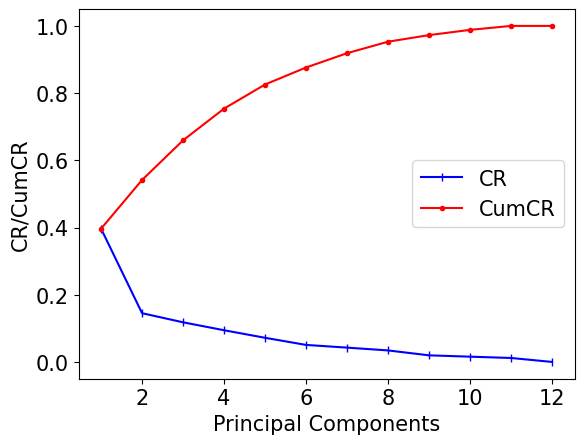

In [4]:
PCcum_contri = pd.concat([PCcontri, PCcumcontri], axis = 1).T
PCcum_contri.index = ['PCcontri', 'PCcumcontri']
x_axis = range(1, PCcontri.shape[0] + 1)
plt.rcParams['font.size'] = 15
plt.xlabel('Principal Components')
plt.ylabel('CR/CumCR')
plt.plot(x_axis, PCcontri.iloc[:, 0], 'b|-', label = 'CR')
plt.plot(x_axis, PCcumcontri.iloc[:, 0], 'r.-', label = 'CumCR')
plt.legend(loc = 'center right')
plt.show()